In [1]:
#Make a running bar chart for states with Covid related cases
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import matplotlib.colors as mc
import colorsys
import datetime
from random import randint
import re

In [2]:
df = pd.read_csv("us-counties.csv")

In [3]:
df = df[['state', 'date', 'cases']]
df['date'] = pd.to_datetime(df.date)
df = pd.DataFrame(df)

In [14]:
covid = df.groupby(['state','date'], as_index=False)['cases'].sum()
covid = covid.sort_values(['date'], ascending=False)
covid.head()

,state,date,cases
0,California,2020-04-08,19043
1,Florida,2020-04-08,15690
2,Georgia,2020-04-08,10204
3,Illinois,2020-04-08,15078
4,Louisiana,2020-04-08,17030


In [15]:
df = (covid[covid['date'].eq("2020-04-08")].sort_values(by="cases",ascending=False).head(10))
df

,state,date,cases
8,New York,2020-04-08,149401
7,New Jersey,2020-04-08,47437
6,Michigan,2020-04-08,20220
0,California,2020-04-08,19043
4,Louisiana,2020-04-08,17030
5,Massachusetts,2020-04-08,16790
9,Pennsylvania,2020-04-08,16414
1,Florida,2020-04-08,15690
3,Illinois,2020-04-08,15078
2,Georgia,2020-04-08,10204


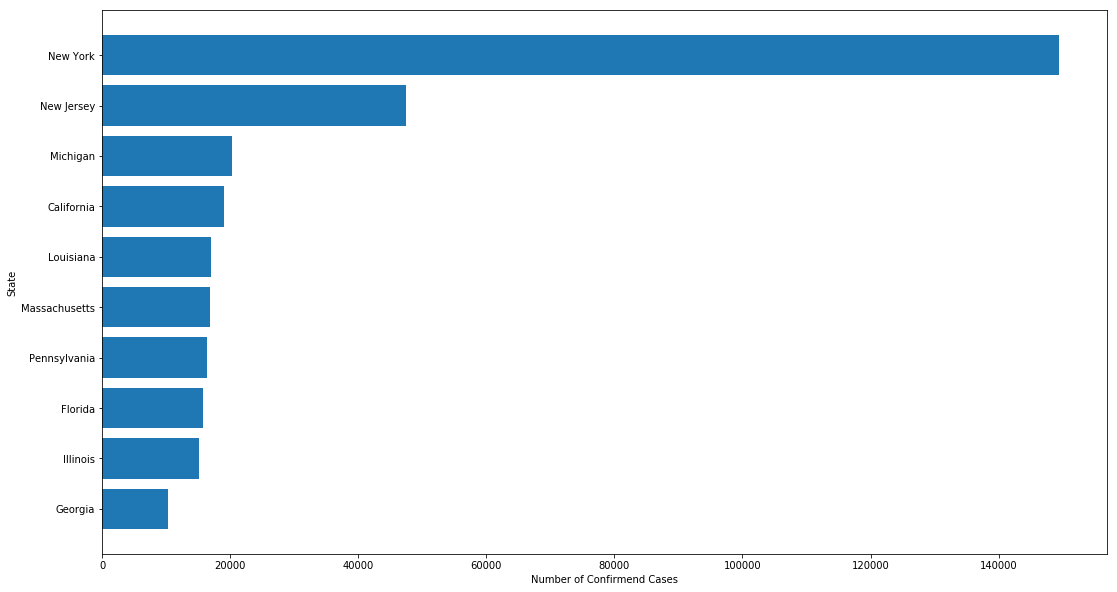

In [13]:
#plot the initial barchart, then flipping chart
dff=df[::-1]
fig, ax = plt.subplots(figsize=(18, 10))
ax.barh(dff['state'], dff['cases'])
plt.xlabel('Number of Confirmend Cases')
plt.ylabel('State')
plt.show()

In [19]:
import random
color_code = []
random.seed(1000)
for i in range(len(covid.state.unique())):
    color_code.append('#%06X' % randint(0, 0xFFFFFF))    
colors = dict(zip(covid.state.unique(),color_code))

Text(1, 0.4, '04-08-2020')

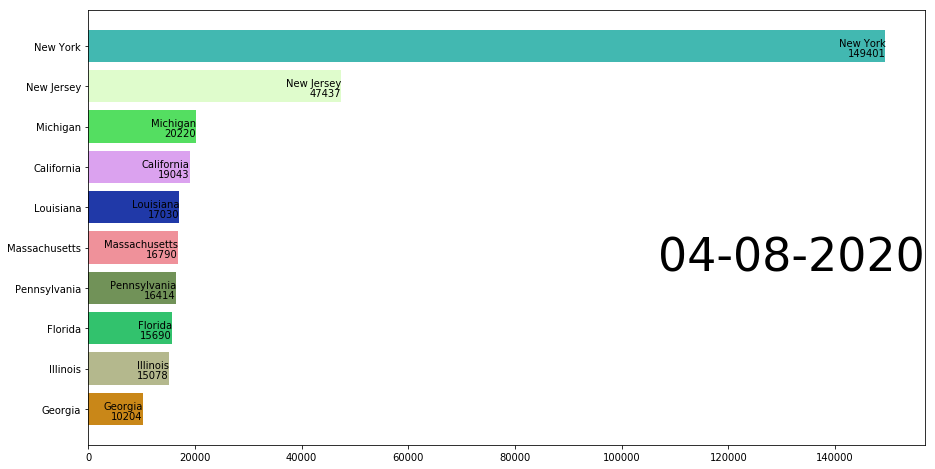

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))
# pass colors values to `color=`
ax.barh(dff['state'], dff['cases'], color=[colors[x] for x in dff['state']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['cases'], dff['state'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-0.25,     value,           ha='right')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, "04-08-2020", transform=ax.transAxes, size=46, ha='right')

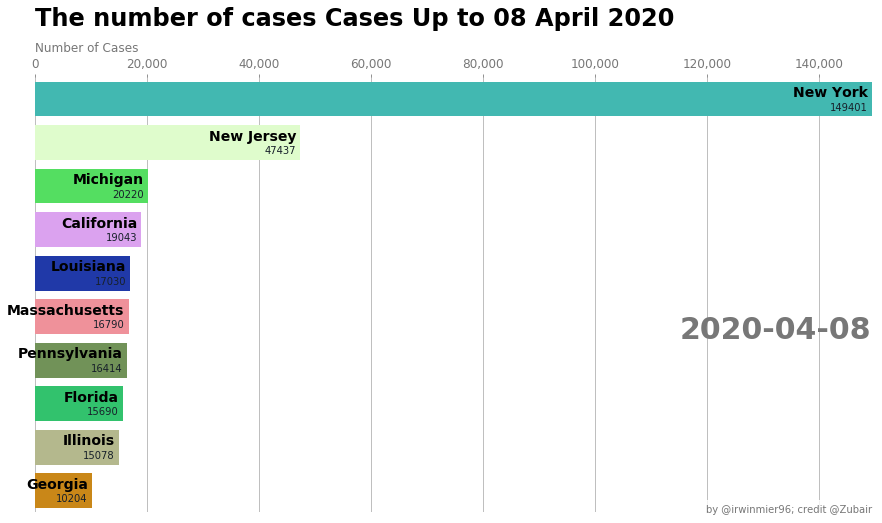

In [30]:
fig, ax = plt.subplots(figsize=(15, 8)) #making function make_barchart so we can call it into a FuncAnimator feature
def make_barchart(date,case="cases"):
    dff= (covid[covid['date'].eq(date)].sort_values(by=case,ascending=False).head(10))[::-1]
    ax.clear()
    color_code = []  #Assigning the color
    random.seed(1000)
    for i in range(len(covid.state.unique())):
        color_code.append('#%06X' % randint(0, 0xFFFFFF))
    colors = dict(zip(covid.state.unique(),color_code)) #giving random colors to states
    ax.barh(dff['state'], dff[case], color=[colors[x] for x in dff['state']])
    dx = dff[case].max() / 200  
    for i, (value, name) in enumerate(zip(dff[case], dff['state'])): #setting text size and position in the chart
        ax.text(value-dx, i, name,  size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, value, size=10, color='#17202A', ha='right', va='baseline')
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=30, ha='right', weight=800)
    ax.text(0, 1.06, 'Number of Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The number of '+str(case)+' Cases Up to 08 April 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @irwinmier96; credit @Zubair', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
    
make_barchart('2020-04-08')

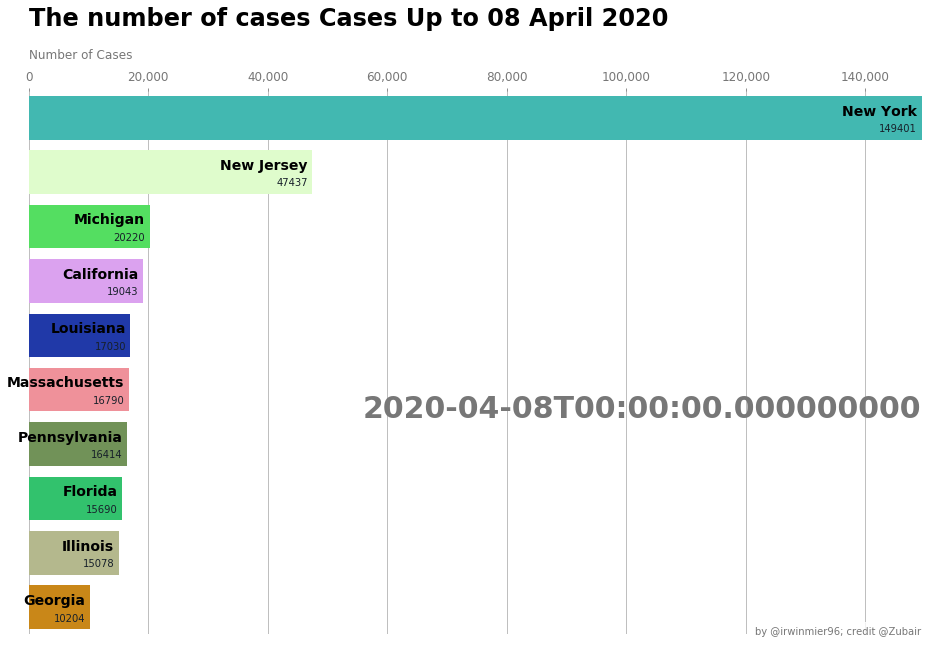

In [40]:
from IPython.display import HTML #use if you want to put it in HTML
ig,ax = plt.subplots(figsize=(16,10)) #Set figure for plot
animator = animation.FuncAnimation(fig, make_barchart, frames=covid.date.unique(),interval=300) #Building animation
# animator.save("Visualizations/running_cart_states")

HTML(animator.to_jshtml())